# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [10]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

⭐Run the following code to read in the "cardio.csv" file.

In [2]:
df = pd.read_csv("cardio.csv", sep=";")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.shape

(70000, 13)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

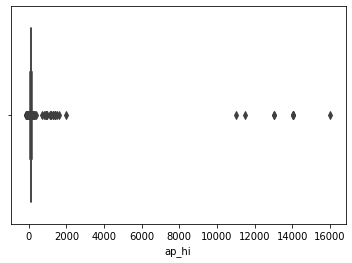

In [8]:
sns.boxplot(x="ap_hi", data=df);

In [12]:
df = df[(df["ap_hi"] < 250) & (df["ap_hi"] > 0)] #tahmini

In [14]:
iqr = stats.iqr(df.ap_hi)
iqr

20.0

In [15]:
np.percentile(df.ap_hi, 75) + 1.5*iqr

170.0

In [16]:
np.percentile(df.ap_hi, 25) - 1.5*iqr

90.0

<AxesSubplot:xlabel='ap_hi'>

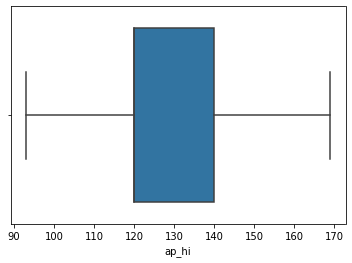

In [17]:
df = df[(df["ap_hi"] < 170) & (df["ap_hi"] > 90)] # guess with iqr 
sns.boxplot(x="ap_hi", data=df)

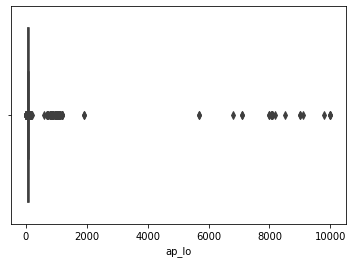

In [18]:
sns.boxplot(x="ap_lo", data=df);

<AxesSubplot:xlabel='ap_lo'>

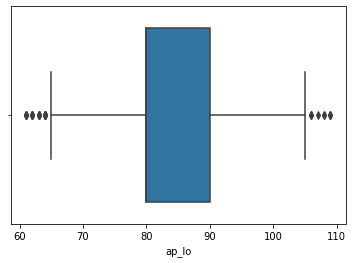

In [19]:
df = df[(df["ap_lo"] < 110) & (df["ap_lo"] > 60)] # just guess
sns.boxplot(x="ap_lo", data=df)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,63834.0,49979.559451,28857.662001,0.0,24942.5,50037.0,74899.75,99999.0
age,63834.0,19488.099508,2457.996448,10859.0,17713.0,19714.0,21338.00,23713.0
gender,63834.0,1.351928,0.477576,1.0,1.0,1.0,2.00,2.0
height,63834.0,164.466256,8.144080,55.0,159.0,165.0,170.00,250.0
weight,63834.0,74.211244,14.082985,11.0,65.0,72.0,82.00,200.0
ap_hi,63834.0,126.346242,13.779643,93.0,120.0,120.0,140.00,169.0
ap_lo,63834.0,81.714838,7.639202,61.0,80.0,80.0,90.00,109.0
cholesterol,63834.0,1.362315,0.679101,1.0,1.0,1.0,1.00,3.0
gluc,63834.0,1.225115,0.572492,1.0,1.0,1.0,1.00,3.0
smoke,63834.0,0.087665,0.282809,0.0,0.0,0.0,0.00,1.0


In [ ]:
# take a sample for to comment easily

In [22]:
df = df.sample(n=500)

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,500.0,50953.3600,28913.825850,207.0,26445.75,49494.5,76382.000,99837.0
age,500.0,19506.6020,2349.937384,14367.0,17981.00,19696.0,21427.000,23508.0
gender,500.0,1.3660,0.482192,1.0,1.00,1.0,2.000,2.0
height,500.0,164.4180,8.686668,105.0,159.00,165.0,170.000,189.0
weight,500.0,74.0862,13.589818,40.0,65.00,72.0,82.325,130.0
ap_hi,500.0,126.2320,14.003084,100.0,120.00,120.0,140.000,169.0
ap_lo,500.0,81.0300,7.472401,65.0,80.00,80.0,90.000,109.0
cholesterol,500.0,1.3420,0.667778,1.0,1.00,1.0,1.000,3.0
gluc,500.0,1.2280,0.583693,1.0,1.00,1.0,1.000,3.0
smoke,500.0,0.0820,0.274639,0.0,0.00,0.0,0.000,1.0


## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

⭐What is the mean for Systolic blood pressure?

In [24]:
df.ap_hi.mean()

126.232

⭐What is the standard deviation for Systolic blood pressure?

In [25]:
df.ap_hi.std()

14.003083542470023

⭐What is the standard error of the mean for Systolic blood pressure?

In [26]:
df.ap_hi.sem()

0.6262369339114306

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [29]:
stats.t.interval(alpha=0.90, df=500-1, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(125.20001602550961, 127.26398397449039)

In [30]:
stats.t.interval(alpha=0.95, df=500-1, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(125.00161389022222, 127.46238610977778)

In [31]:
stats.t.interval(alpha=0.99, df=500-1, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(124.61272808616769, 127.8512719138323)

## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

In [ ]:
#H0: mu = 122
#Ha: mu != 122

Conduct the significance test. Use scipy.stats.ttest_1samp

In [32]:
stats.ttest_1samp(df.ap_hi, 122)

Ttest_1sampResult(statistic=6.757825626104856, pvalue=3.91806252489807e-11)

In [ ]:
# conc: reject to null beacuse: pvalue < alpha

## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [35]:
df.groupby("gender").describe()["ap_hi"].T

gender,1,2
count,317.000000,183.000000
mean,125.971609,126.683060
std,14.227219,13.632866
min,100.000000,100.000000
25%,120.000000,120.000000
50%,120.000000,120.000000
75%,140.000000,140.000000
max,169.000000,160.000000


___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [36]:
stats.levene(df[df["gender"]==1]["ap_hi"], df[df["gender"]==2]["ap_hi"])

LeveneResult(statistic=0.016026372180412748, pvalue=0.899311805705073)

In [37]:
stat, p = stats.levene(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=0.016, p=0.899
The population variances of group 1 and 2 are equal (fail to reject H0)


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [40]:
stats.ttest_ind(df[df["gender"]==1]["ap_hi"], df[df["gender"]==2]["ap_hi"], equal_var=True)

Ttest_indResult(statistic=-0.5468729248417771, pvalue=0.5847109929428413)

## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

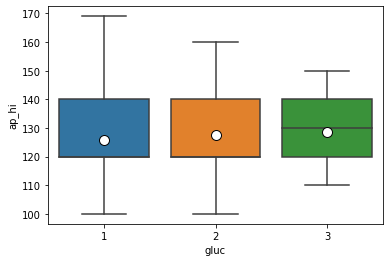

In [42]:
sns.boxplot(x="gluc", y="ap_hi", data=df, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

⭐Show the descriptive statistics of 3 groups.

In [43]:
df.groupby("gluc").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,427.0,125.922717,14.095786,100.0,120.0,120.0,140.0,169.0
2,32.0,127.468750,15.694635,100.0,120.0,120.0,140.0,160.0
3,41.0,128.487805,11.478506,110.0,120.0,130.0,140.0,150.0


⭐Conduct the relavant statistical test to see if there is a significant difference between the mean of the groups.

In [ ]:
#H0: All means are equal (mu1=mu2=mu3)
#Ha: At least one mean is different

In [44]:
stats.f_oneway(df[df["gluc"]==1]["ap_hi"], df[df["gluc"]==2]["ap_hi"], df[df["gluc"]==3]["ap_hi"])

F_onewayResult(statistic=0.7602235070640168, pvalue=0.4681048280533161)

In [ ]:
# conc: pvalue > alpha => all means are equal

In [ ]:
# below steps for tukey test.

In [45]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [46]:
MultiComparison(data=df["ap_hi"], groups=df["gluc"])

In [48]:
multicomp = MultiComparison(data=df["ap_hi"], groups=df["gluc"])

In [49]:
multicomp.tukeyhsd(alpha=0.05)

In [50]:
tukey = multicomp.tukeyhsd(alpha=0.05)

In [51]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2    1.546  0.819 -4.4901 7.5821  False
     1      3   2.5651 0.5023 -2.8196 7.9497  False
     2      3   1.0191 0.9489 -6.7494 8.7875  False
---------------------------------------------------


## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

⭐Create a crosstab using Pandas.

In [ ]:
# H0: The two categorical variables are independent
# Ha: the two categorical variables are dependent

⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.

In [54]:
ct = pd.crosstab(df.active, df.cardio)  # cross table for chi2 test
ct

cardio,0,1
active,,
0,35,55
1,207,203


In [56]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [57]:
print("test statistic", chi)
print("p-value", p)

test statistic 3.5246715943359086
p-value 0.06046180210847427


In [61]:
#degree of freedom                  # it is 1 for 2x2 tables
print("degree of freedom:", dof)

degree of freedom: 1


In [62]:
#expected
print("expected values:", expected)

expected values: [[ 43.56  46.44]
 [198.44 211.56]]


In [63]:
# for cholesterol
ch = pd.crosstab(df.cholesterol, df.cardio)
ch

cardio,0,1
cholesterol,,
1,211,173
2,20,41
3,11,44


In [64]:
chi, p, dof, expected = stats.chi2_contingency(ch)
print("test statistic", chi)
print("p-value", p)

test statistic 30.30896123969744
p-value 2.621154923418262e-07


In [ ]:
# result:significant --> pvalue<alpha
# Tehere is statistically significant relationshio between cholestoral and cardio